<a href="https://colab.research.google.com/github/EduardaDalmas/reviews_tripadvisor_dataset/blob/main/trabalho_final_ciencia_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
dataset = pd.read_csv('tripadvisor_review.csv', sep=',')
dataset.head()

User ID  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1        0.93         1.8        2.29        0.62        0.80   
1  User 2        1.02         2.2        2.66        0.64        1.42   
2  User 3        1.22         0.8        0.54        0.53        0.24   
3  User 4        0.45         1.8        0.29        0.57        0.46   
4  User 5        0.51         1.2        1.18        0.57        1.54   

   Category 6  Category 7  Category 8  Category 9  Category 10  
0        2.42        3.19        2.79        1.82         2.42  
1        3.18        3.21        2.63        1.86         2.32  
2        1.54        3.18        2.80        1.31         2.50  
3        1.52        3.18        2.96        1.57         2.86  
4        2.02        3.18        2.78        1.18         2.54

In [3]:
dataset.shape

(980, 11)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [5]:
print("Valores ausentes por coluna:\n", dataset.isnull().sum())

Valores ausentes por coluna:
 User ID        0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
dtype: int64


In [6]:
dataset.describe()

Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
count  980.000000  980.000000  980.000000  980.000000  980.000000  980.000000   
mean     0.893194    1.352612    1.013306    0.532500    0.939735    1.842898   
std      0.326912    0.478280    0.788607    0.279731    0.437430    0.539538   
min      0.340000    0.000000    0.130000    0.150000    0.060000    0.140000   
25%      0.670000    1.080000    0.270000    0.410000    0.640000    1.460000   
50%      0.830000    1.280000    0.820000    0.500000    0.900000    1.800000   
75%      1.020000    1.560000    1.572500    0.580000    1.200000    2.200000   
max      3.220000    3.640000    3.620000    3.440000    3.300000    3.760000   

       Category 7  Category 8  Category 9  Category 10  
count  980.000000  980.000000  980.000000   980.000000  
mean     3.180939    2.835061    1.569439     2.799224  
std      0.007824    0.137505    0.364629     0.321380  
min      3.160000    2.420000    0.740000     2.140000  
25%      3.180000    2.740000    1.310000     2.540000  
50%      3.180000    2.820000    1.540000     2.780000  
75%      3.180000    2.910000    1.760000     3.040000  
max      3.210000    3.390000    3.170000     3.660000

In [7]:
dataset.columns = [
    'User ID',
    'Category 1: Average user feedback on art galleries',
    'Category 2: Average user feedback on dance clubs',
    'Category 3: Average user feedback on juice bars',
    'Category 4: Average user feedback on restaurants',
    'Category 5: Average user feedback on museums',
    'Category 6: Average user feedback on resorts',
    'Category 7: Average user feedback on parks/picnic spots',
    'Category 8: Average user feedback on beaches',
    'Category 9: Average user feedback on theaters',
    'Category 10: Average user feedback on religious institutions',
]


In [8]:
dataset.columns

Index(['User ID', 'Category 1: Average user feedback on art galleries',
       'Category 2: Average user feedback on dance clubs',
       'Category 3: Average user feedback on juice bars',
       'Category 4: Average user feedback on restaurants',
       'Category 5: Average user feedback on museums',
       'Category 6: Average user feedback on resorts',
       'Category 7: Average user feedback on parks/picnic spots',
       'Category 8: Average user feedback on beaches',
       'Category 9: Average user feedback on theaters',
       'Category 10: Average user feedback on religious institutions'],
      dtype='object')

In [9]:
dataset.describe()

Category 1: Average user feedback on art galleries  \
count                                         980.000000    
mean                                            0.893194    
std                                             0.326912    
min                                             0.340000    
25%                                             0.670000    
50%                                             0.830000    
75%                                             1.020000    
max                                             3.220000    

       Category 2: Average user feedback on dance clubs  \
count                                        980.000000   
mean                                           1.352612   
std                                            0.478280   
min                                            0.000000   
25%                                            1.080000   
50%                                            1.280000   
75%                                            1.560000   
max                                            3.640000   

       Category 3: Average user feedback on juice bars  \
count                                       980.000000   
mean                                          1.013306   
std                                           0.788607   
min                                           0.130000   
25%                                           0.270000   
50%                                           0.820000   
75%                                           1.572500   
max                                           3.620000   

       Category 4: Average user feedback on restaurants  \
count                                        980.000000   
mean                                           0.532500   
std                                            0.279731   
min                                            0.150000   
25%                                            0.410000   
50%                                            0.500000   
75%                                            0.580000   
max                                            3.440000   

       Category 5: Average user feedback on museums  \
count                                    980.000000   
mean                                       0.939735   
std                                        0.437430   
min                                        0.060000   
25%                                        0.640000   
50%                                        0.900000   
75%                                        1.200000   
max                                        3.300000   

       Category 6: Average user feedback on resorts  \
count                                    980.000000   
mean                                       1.842898   
std                                        0.539538   
min                                        0.140000   
25%                                        1.460000   
50%                                        1.800000   
75%                                        2.200000   
max                                        3.760000   

       Category 7: Average user feedback on parks/picnic spots  \
count                                         980.000000         
mean                                            3.180939         
std                                             0.007824         
min                                             3.160000         
25%                                             3.180000         
50%                                             3.180000         
75%                                             3.180000         
max                                             3.210000         

       Category 8: Average user feedback on beaches  \
count                                    980.000000   
mean                                       2.835061   
std                                        0.137505   
min                                        2.420000   
25%     

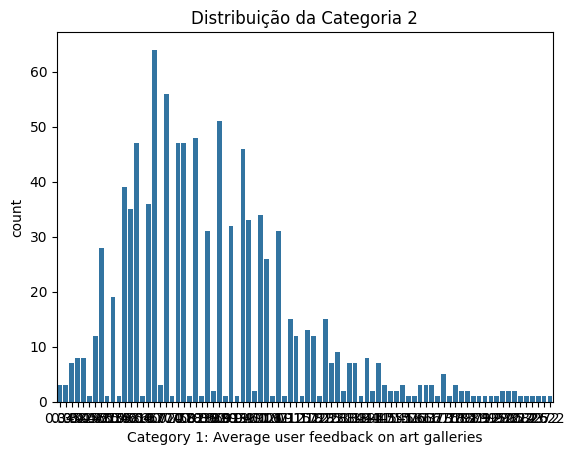

In [10]:
sns.countplot(data=dataset, x='Category 1: Average user feedback on art galleries')
plt.title('Distribuição da Categoria 2')
plt.show()

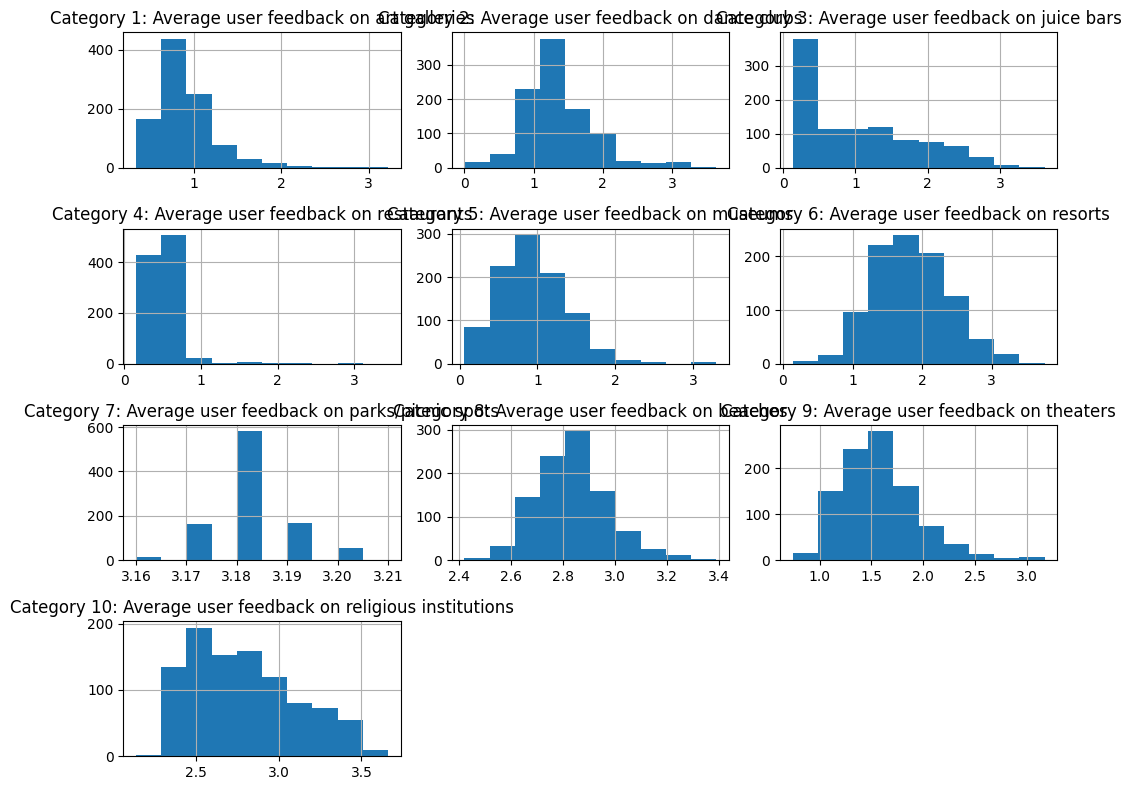

In [11]:
dataset.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

User ID                                                          object
Category 1: Average user feedback on art galleries              float64
Category 2: Average user feedback on dance clubs                float64
Category 3: Average user feedback on juice bars                 float64
Category 4: Average user feedback on restaurants                float64
Category 5: Average user feedback on museums                    float64
Category 6: Average user feedback on resorts                    float64
Category 7: Average user feedback on parks/picnic spots         float64
Category 8: Average user feedback on beaches                    float64
Category 9: Average user feedback on theaters                   float64
Category 10: Average user feedback on religious institutions    float64
dtype: object
Index(['Category 1: Average user feedback on art galleries',
       'Category 2: Average user feedback on dance clubs',
       'Category 3: Average user feedback on juice bars',
       'Category

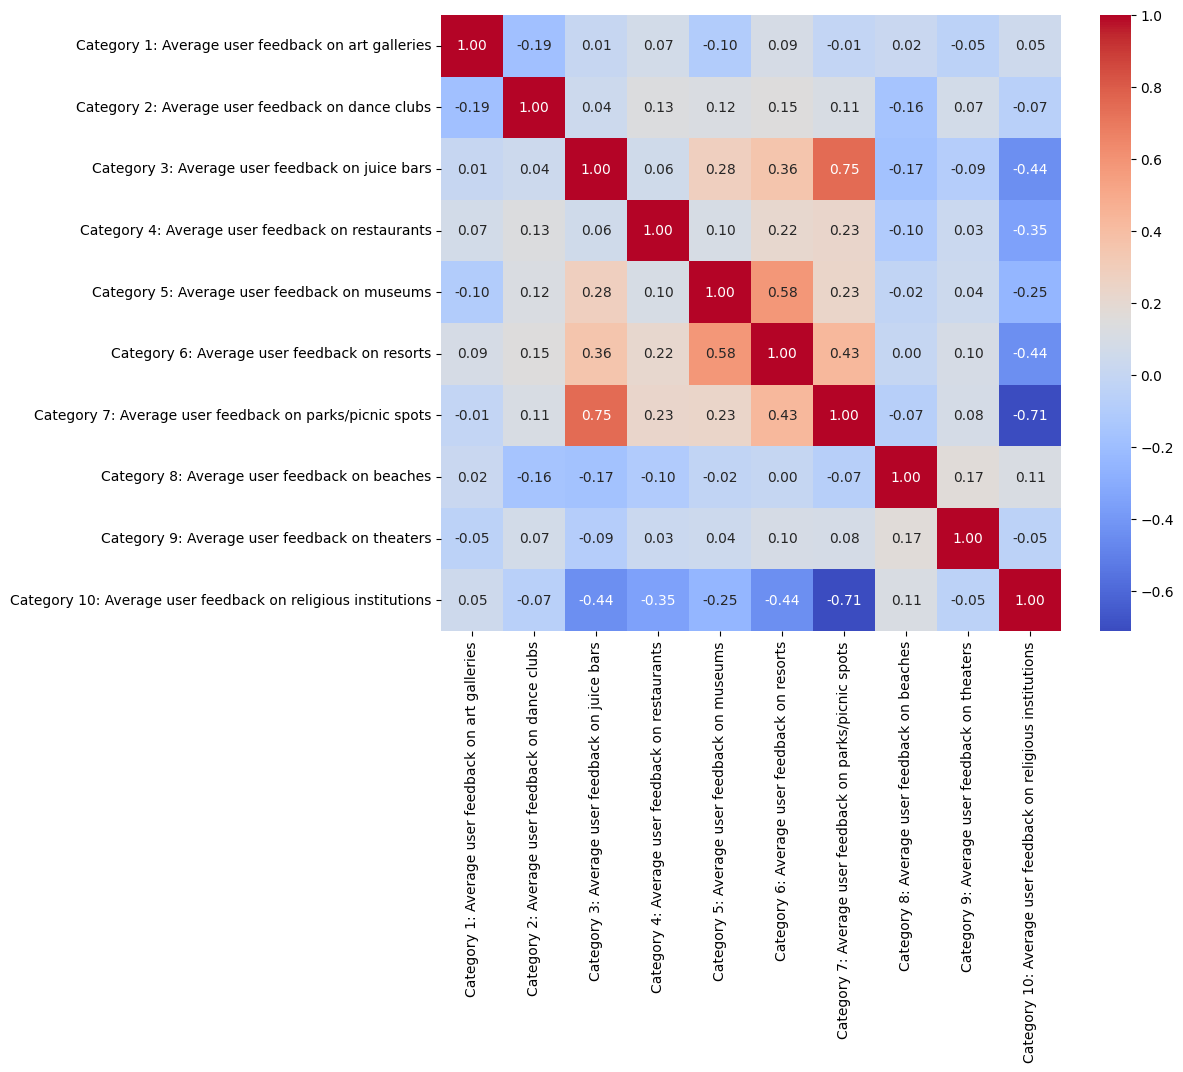

In [12]:
print(dataset.dtypes)

dataset_numerical = dataset.select_dtypes(include=['float64', 'int64'])

print(dataset_numerical.columns)

correlation_matrix = dataset_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


**Notas semelhantes por usuários**

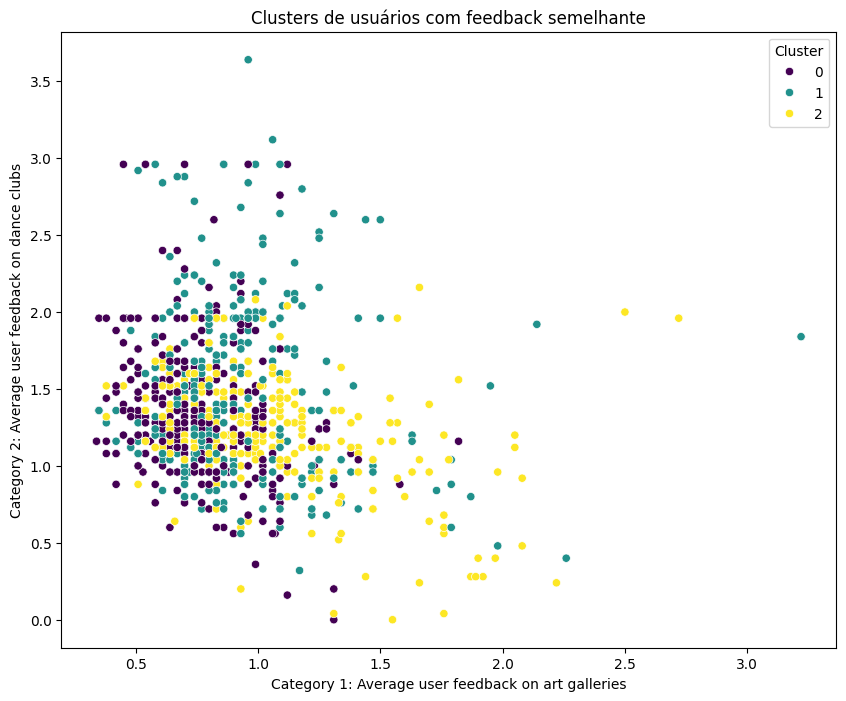

In [13]:
X = dataset.drop(columns=['User ID'])
X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

dataset['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 8))
sns.scatterplot(x=dataset['Category 1: Average user feedback on art galleries'],
                y=dataset['Category 2: Average user feedback on dance clubs'],
                hue=dataset['Cluster'], palette='viridis')
plt.title('Clusters de usuários com feedback semelhante')
plt.show()


In [14]:
X = dataset.drop(columns=['User ID', 'Category 10: Average user feedback on religious institutions'])
y = dataset['Category 9: Average user feedback on theaters']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")


Erro Absoluto Médio (MAE): 0.00
Erro Quadrático Médio (MSE): 0.00


In [15]:
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.13


**Hancking dos feedbacks**

<ipython-input-16-e4e93b1b789c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_means.index, y=category_means.values, palette='coolwarm')


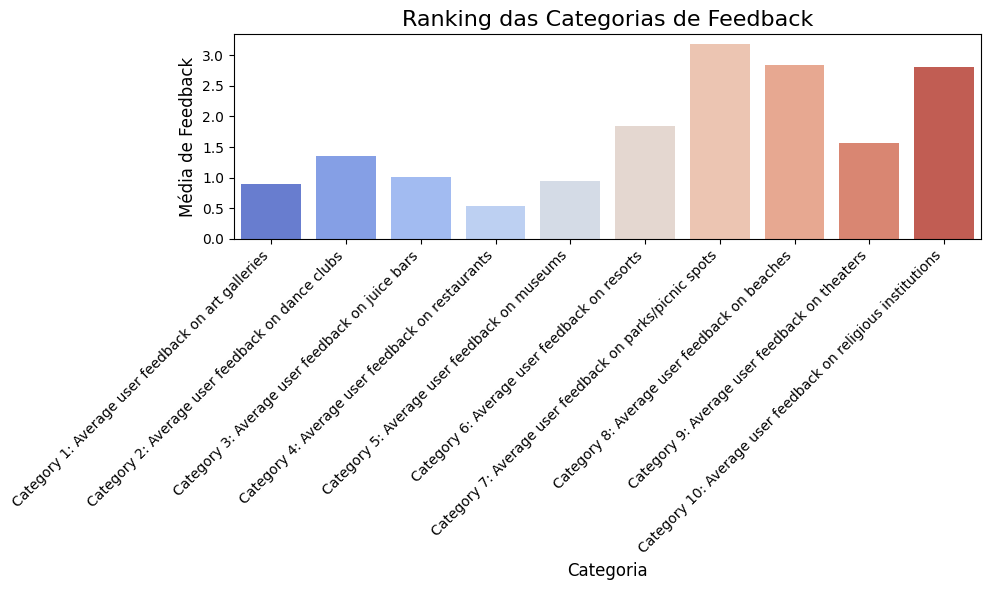

In [16]:
category_columns = [
    'Category 1: Average user feedback on art galleries',
    'Category 2: Average user feedback on dance clubs',
    'Category 3: Average user feedback on juice bars',
    'Category 4: Average user feedback on restaurants',
    'Category 5: Average user feedback on museums',
    'Category 6: Average user feedback on resorts',
    'Category 7: Average user feedback on parks/picnic spots',
    'Category 8: Average user feedback on beaches',
    'Category 9: Average user feedback on theaters',
    'Category 10: Average user feedback on religious institutions'
]

category_means = dataset[category_columns].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_means.index, y=category_means.values, palette='coolwarm')

plt.xticks(rotation=45, ha='right')
plt.title('Ranking das Categorias de Feedback', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Média de Feedback', fontsize=12)

plt.tight_layout()
plt.show()


**Distribuição das notas**


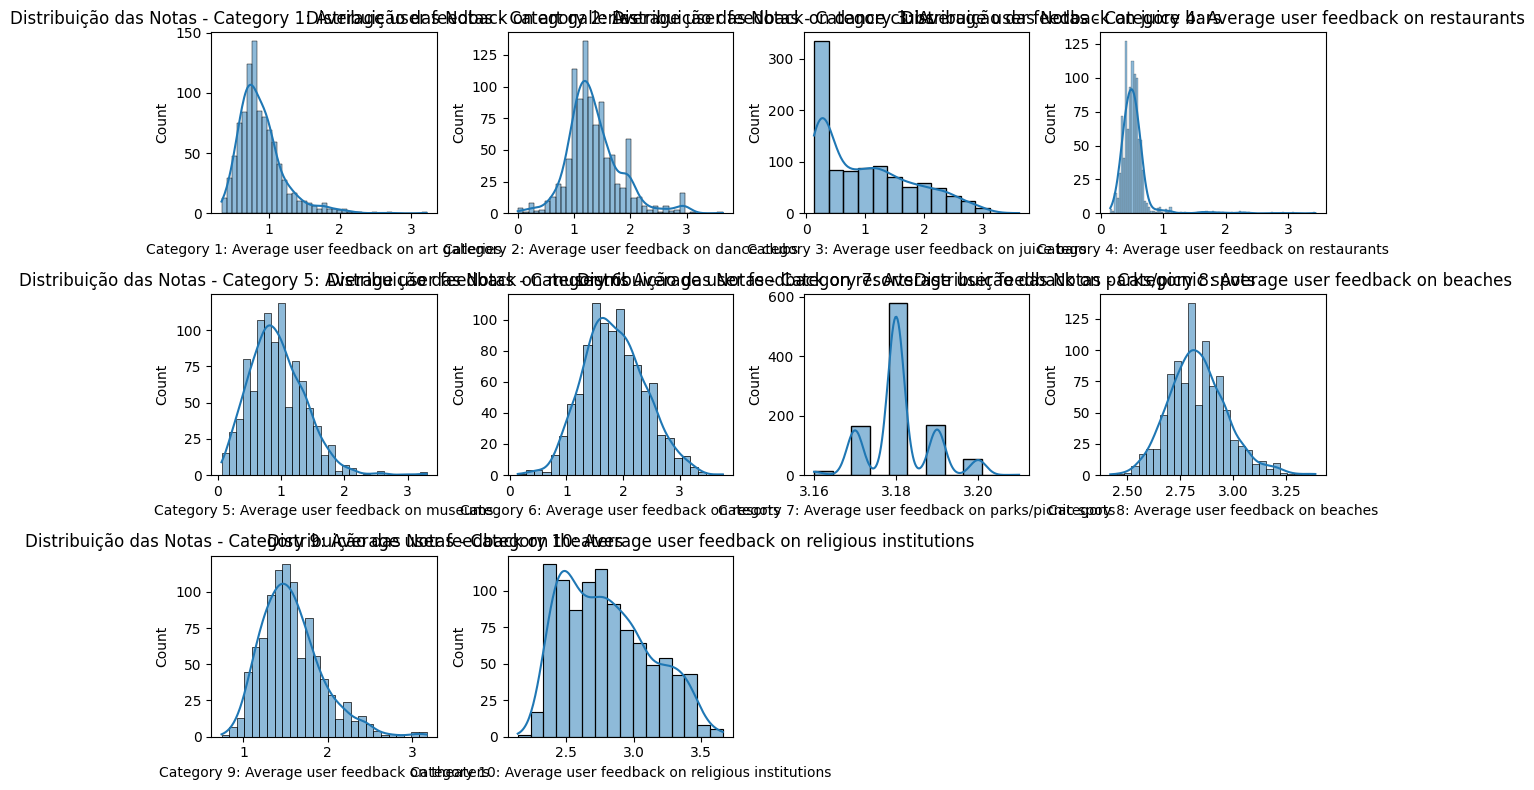

In [17]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(category_columns, 1):
    plt.subplot(3, 4, i)  # Organiza os gráficos em uma grade de 3x4
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Distribuição das Notas - {col}')
plt.tight_layout()
plt.show()


**5 categorias mais e menos votadas**

In [18]:
top_5 = category_means.sort_values(ascending=False).head(5)
bottom_5 = category_means.sort_values(ascending=True).head(5)

<ipython-input-19-7af610e34e7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.index, y=top_5.values, palette='Blues_d')


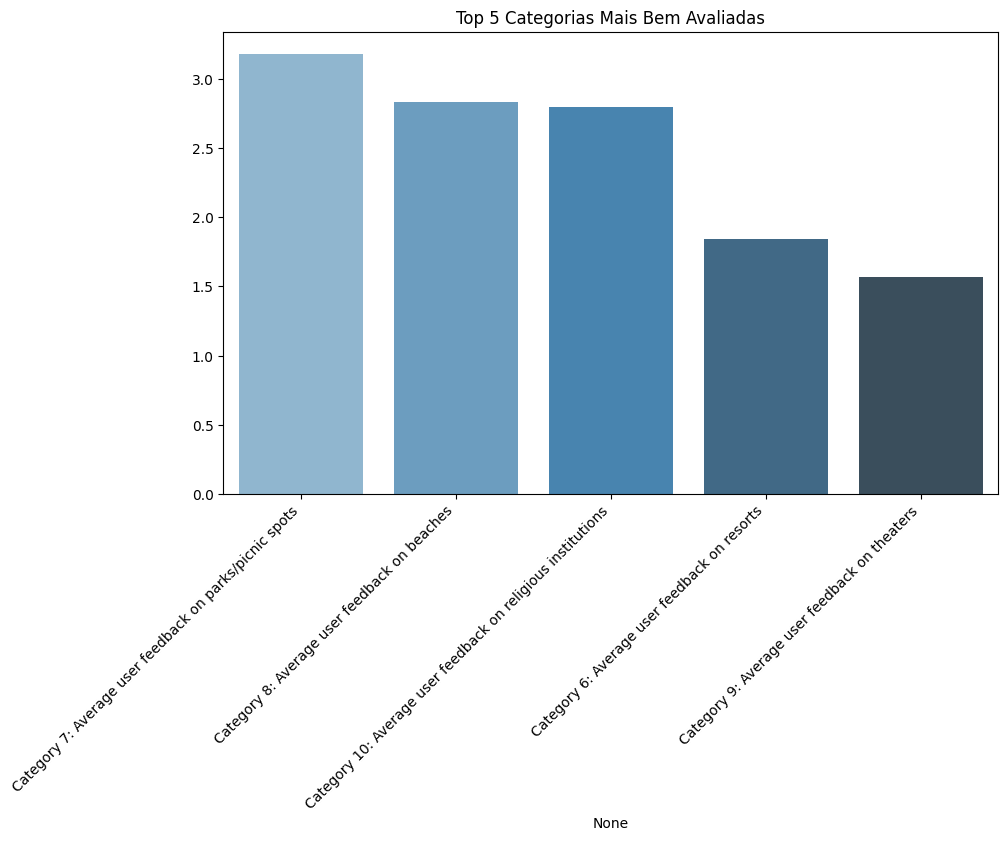

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5.index, y=top_5.values, palette='Blues_d')
plt.title('Top 5 Categorias Mais Bem Avaliadas')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-20-385a84e420c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5.index, y=bottom_5.values, palette='Reds_d')


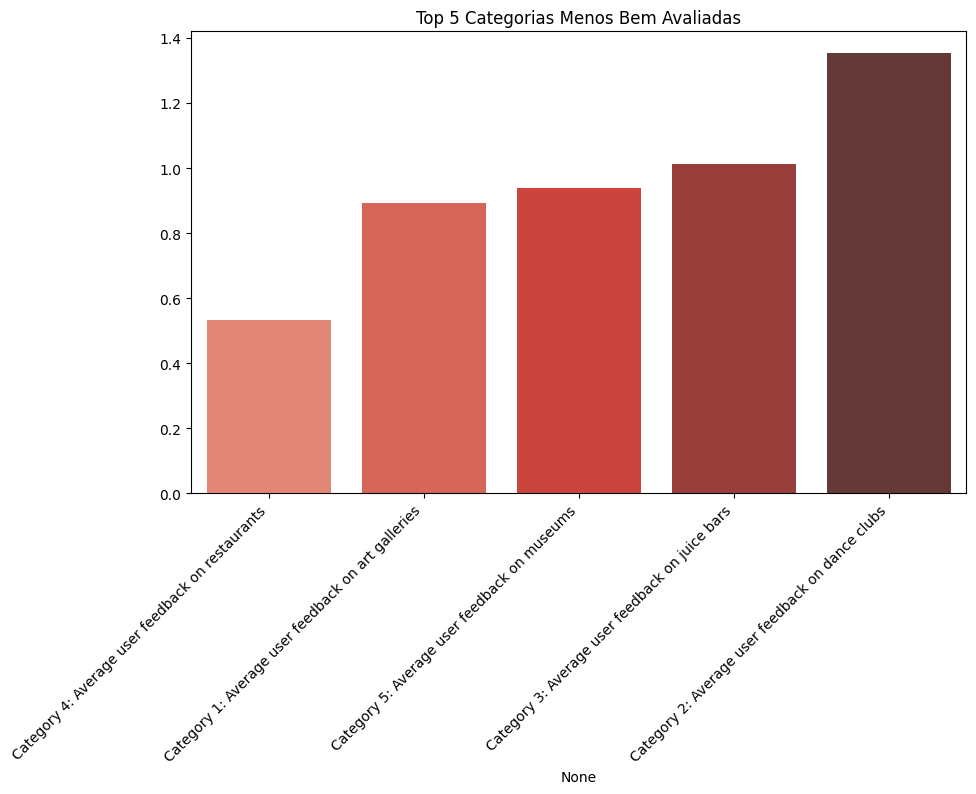

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_5.index, y=bottom_5.values, palette='Reds_d')
plt.title('Top 5 Categorias Menos Bem Avaliadas')
plt.xticks(rotation=45, ha='right')
plt.show()

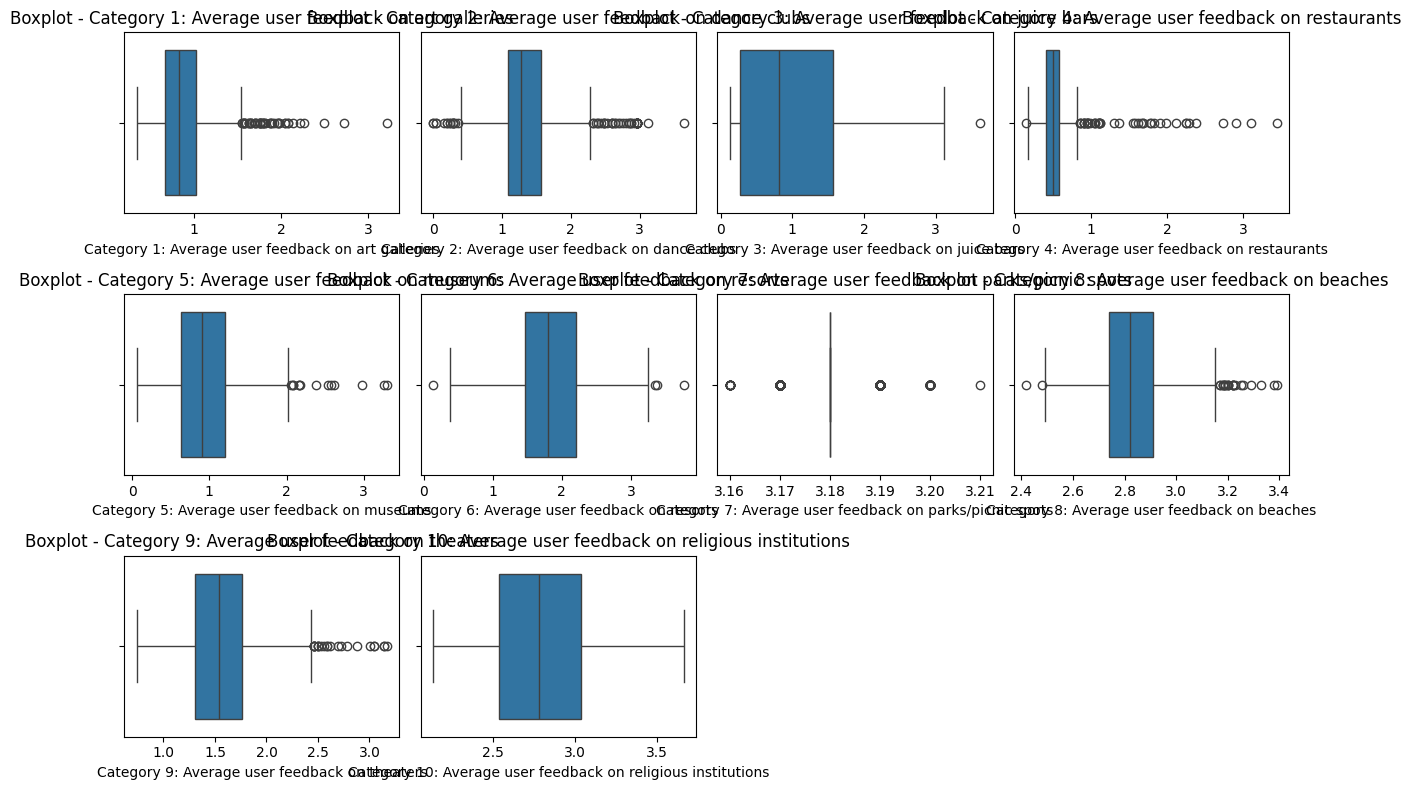

In [21]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(category_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=dataset, x=col)
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()


**Distribuição das notas nas categorias**

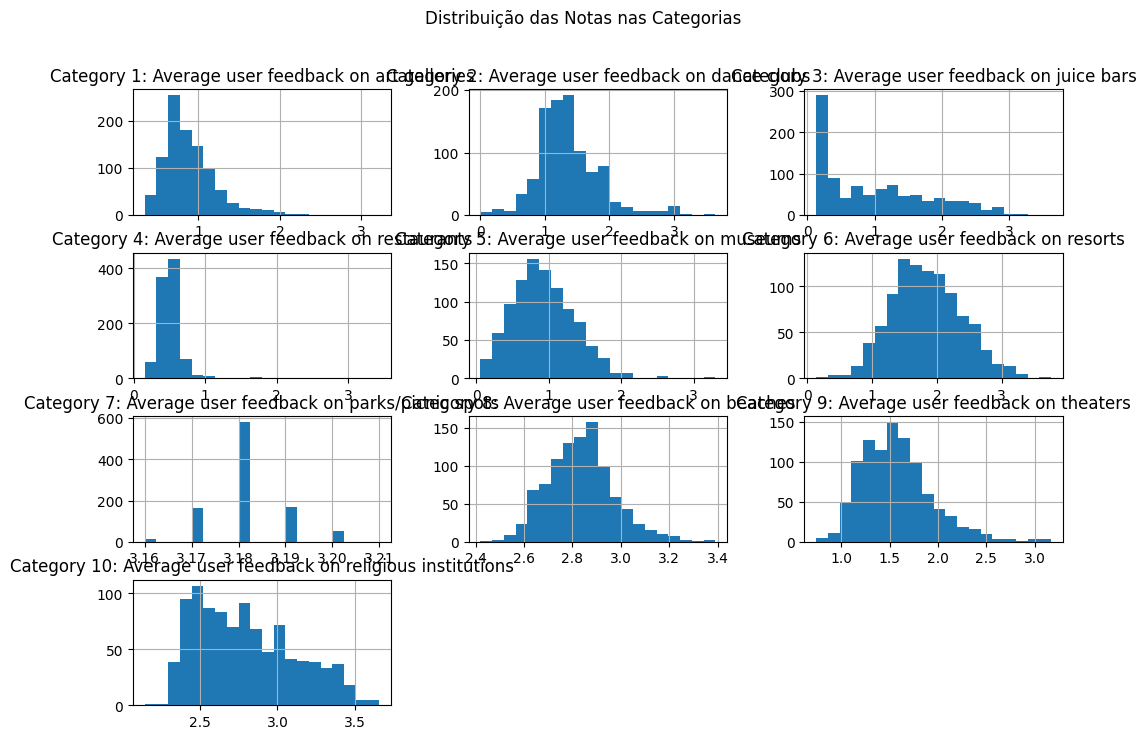

In [22]:
import matplotlib.pyplot as plt

# Definir as colunas de categorias
category_columns = [col for col in dataset.columns if col.startswith('Category')]

# Gerar histogramas para cada categoria
dataset[category_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribuição das Notas nas Categorias')
plt.show()


**Faixas de notas para as categorias**

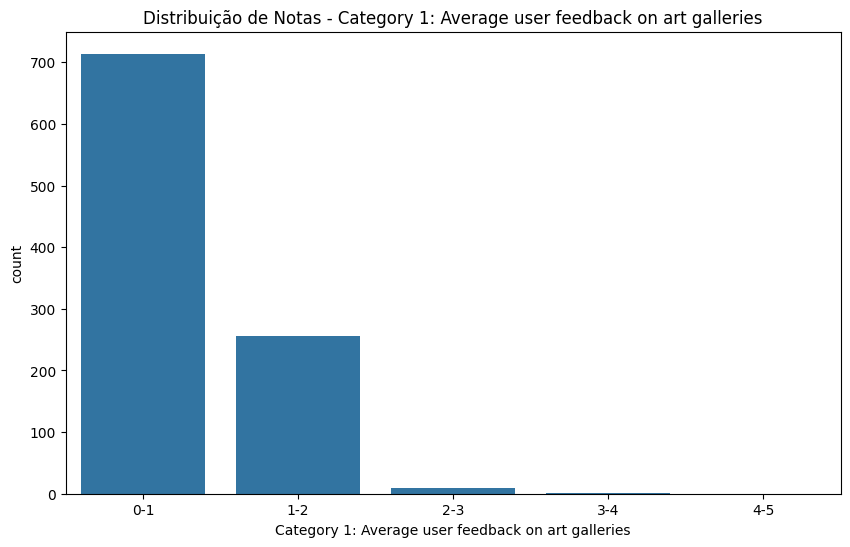

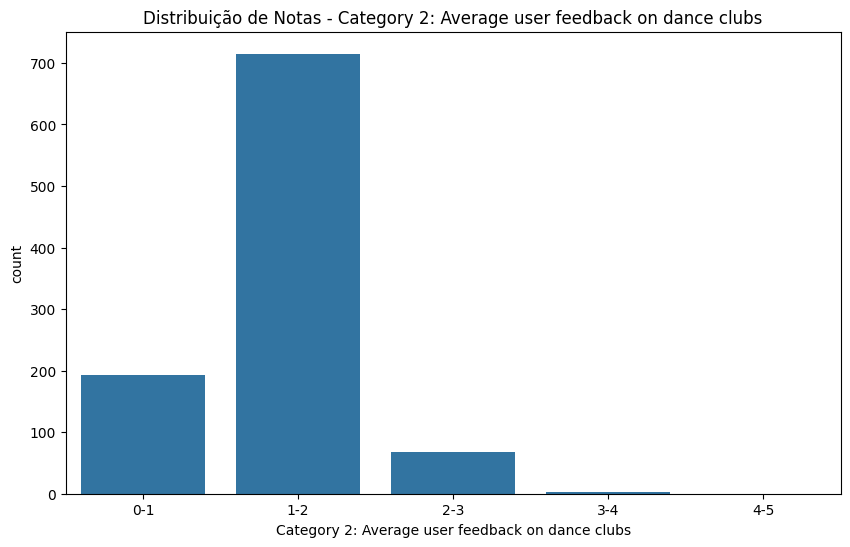

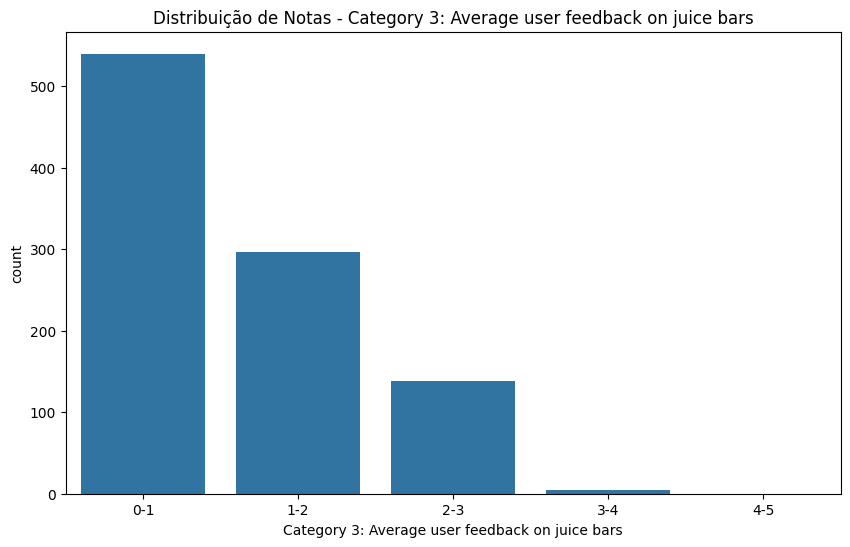

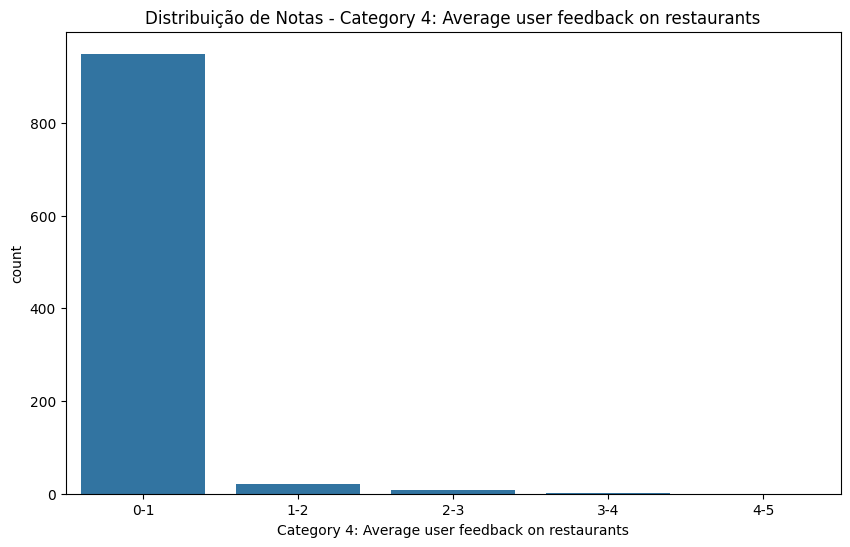

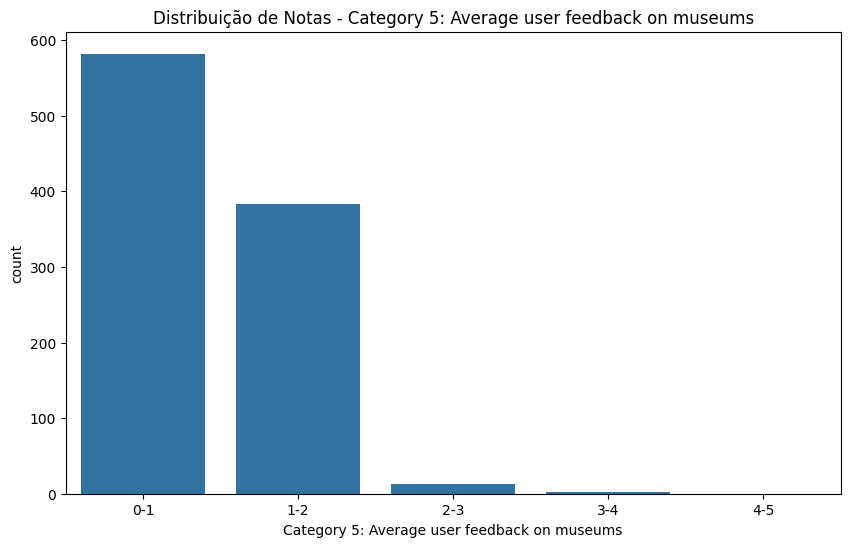

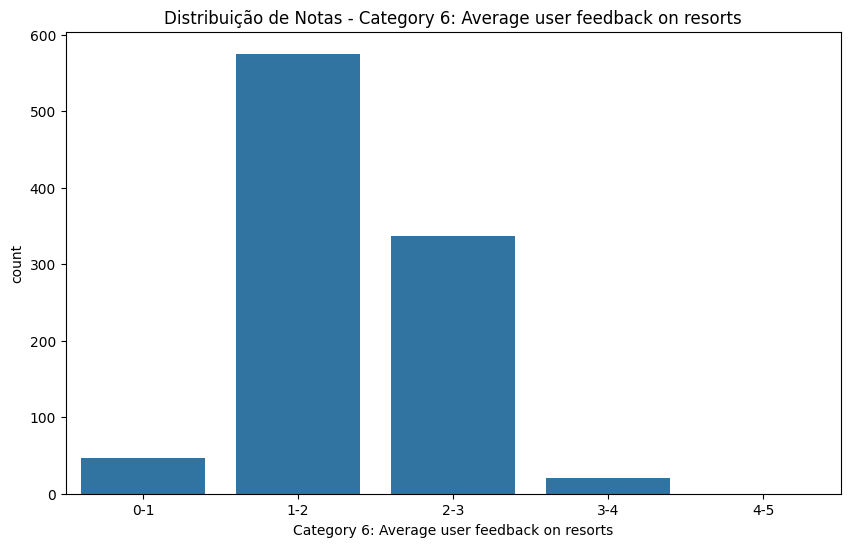

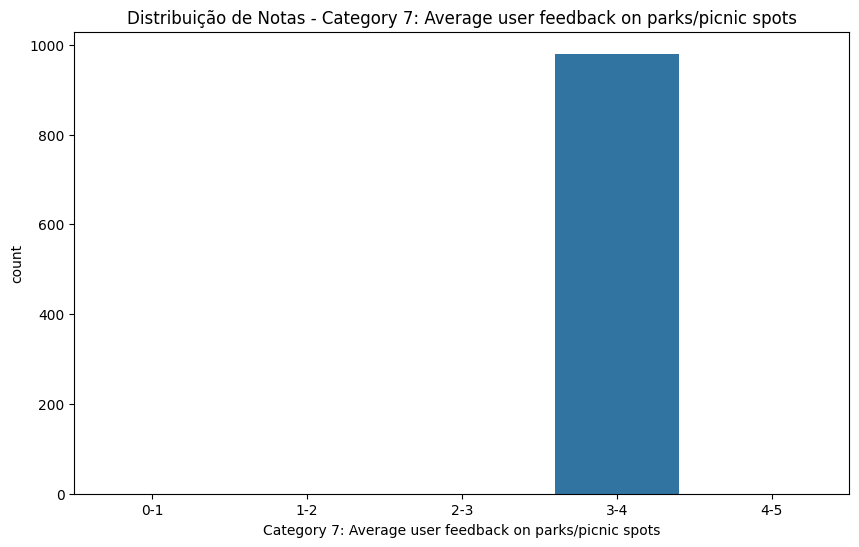

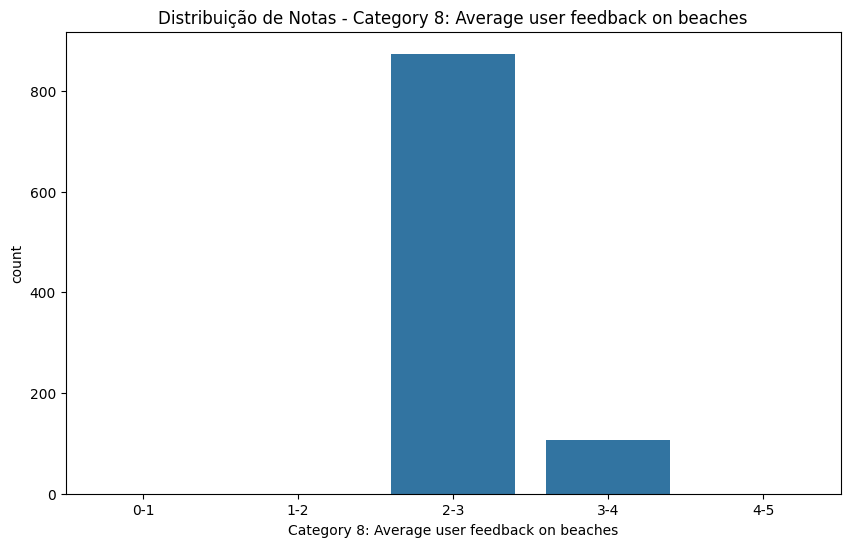

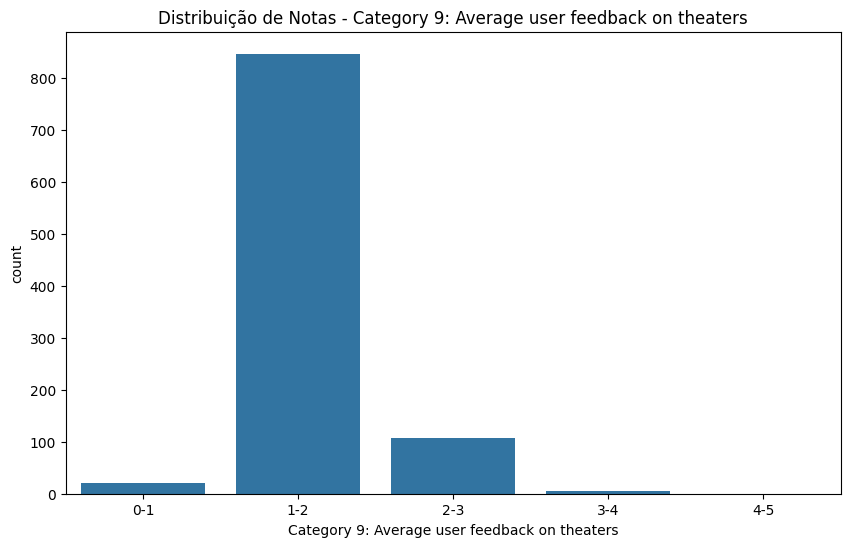

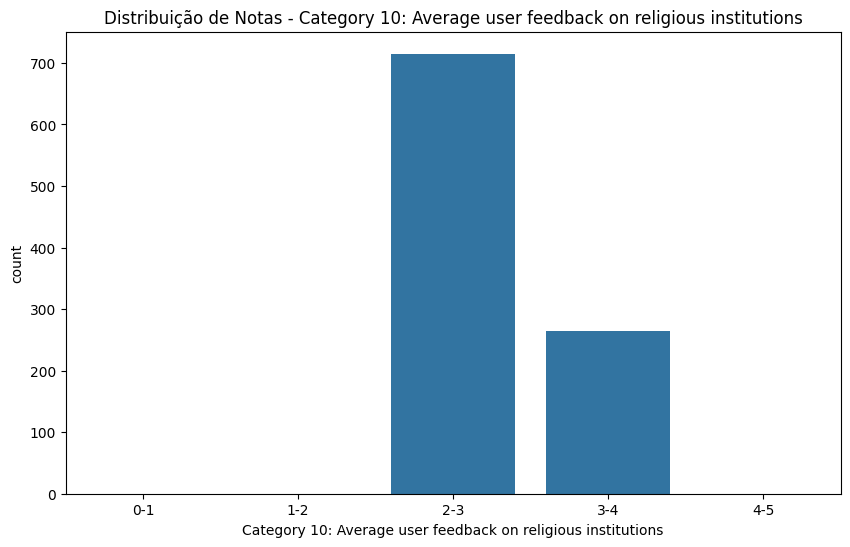

In [23]:
for col in category_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=pd.cut(dataset[col], bins=[0, 1, 2, 3, 4, 5], labels=['0-1', '1-2', '2-3', '3-4', '4-5']))
    plt.title(f'Distribuição de Notas - {col}')
    plt.show()

**Relação entre Variáveis (Pairplot ou Scatterplot)**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

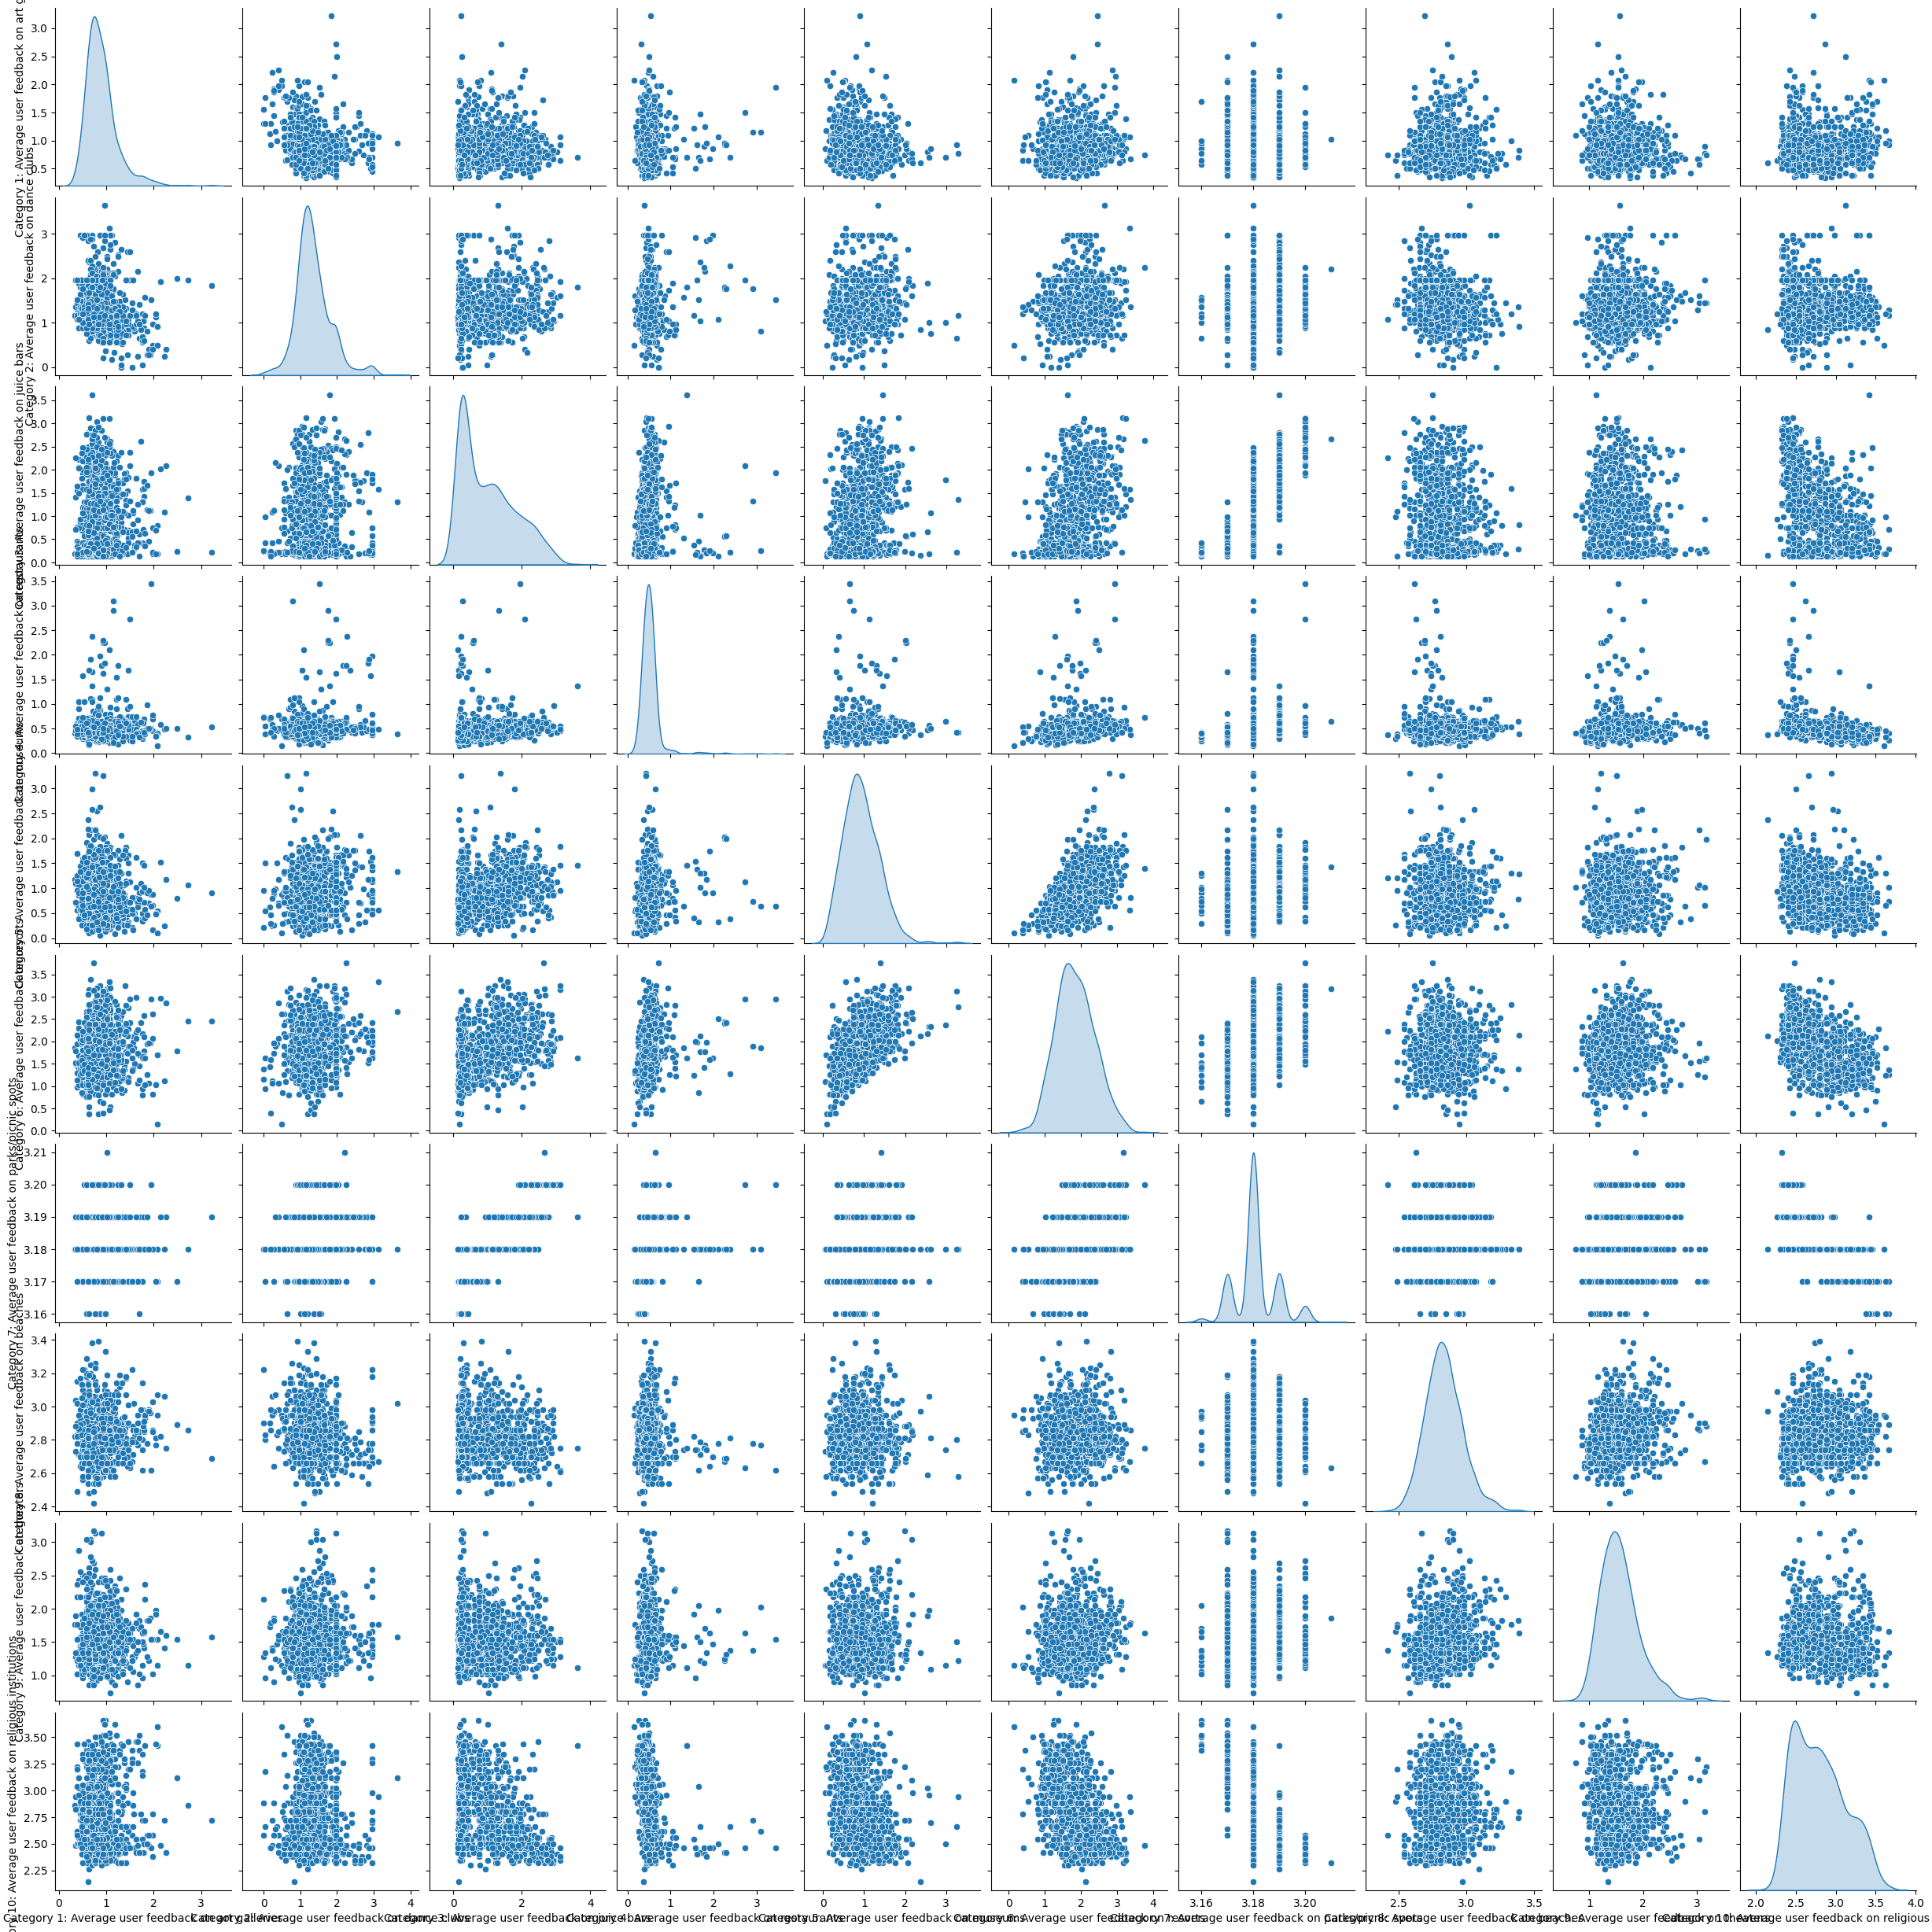

In [24]:
sns.pairplot(dataset[category_columns], diag_kind='kde', palette='coolwarm')
plt.show()


<ipython-input-25-0c6fee11bf7e>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  feedback_pos_neg = dataset[category_columns].applymap(lambda x: 'Positiva' if x >= 4 else 'Negativa')


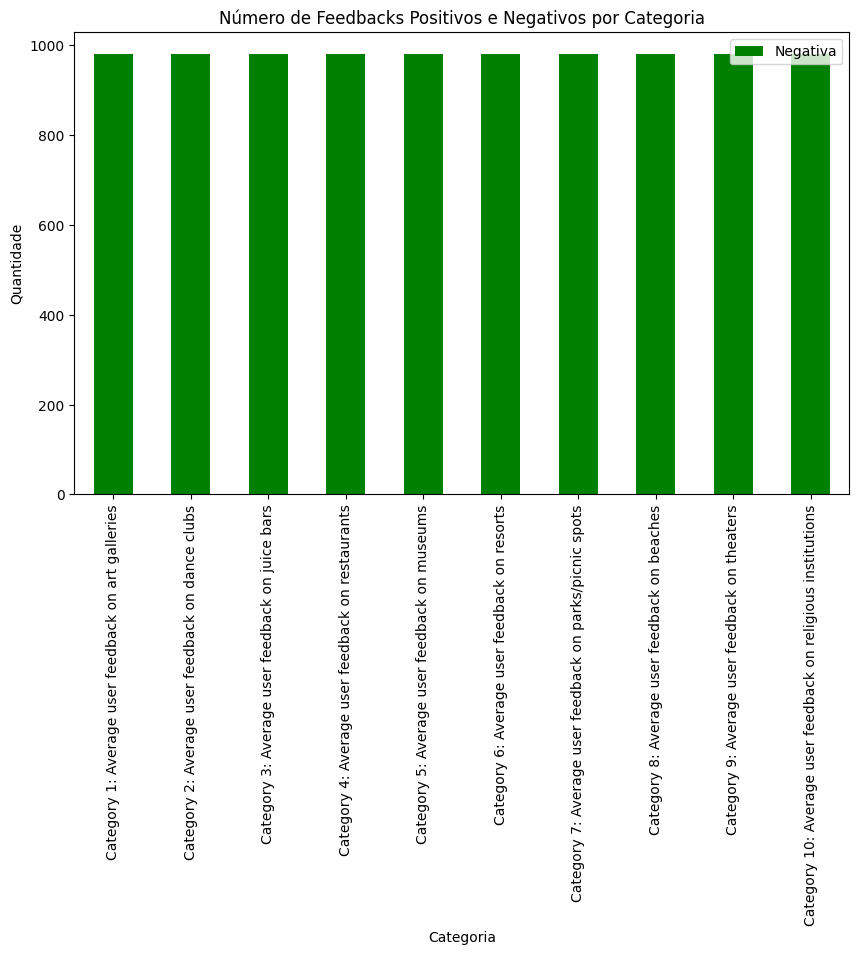

In [25]:
feedback_pos_neg = dataset[category_columns].applymap(lambda x: 'Positiva' if x >= 4 else 'Negativa')

feedback_counts = feedback_pos_neg.apply(pd.Series.value_counts).T
feedback_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])
plt.title('Número de Feedbacks Positivos e Negativos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.show()


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = dataset.drop(columns=['User ID'])
y = dataset['Category 9: Average user feedback on theaters']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7.130500138590913e-30


**Média de feedback por categoria**

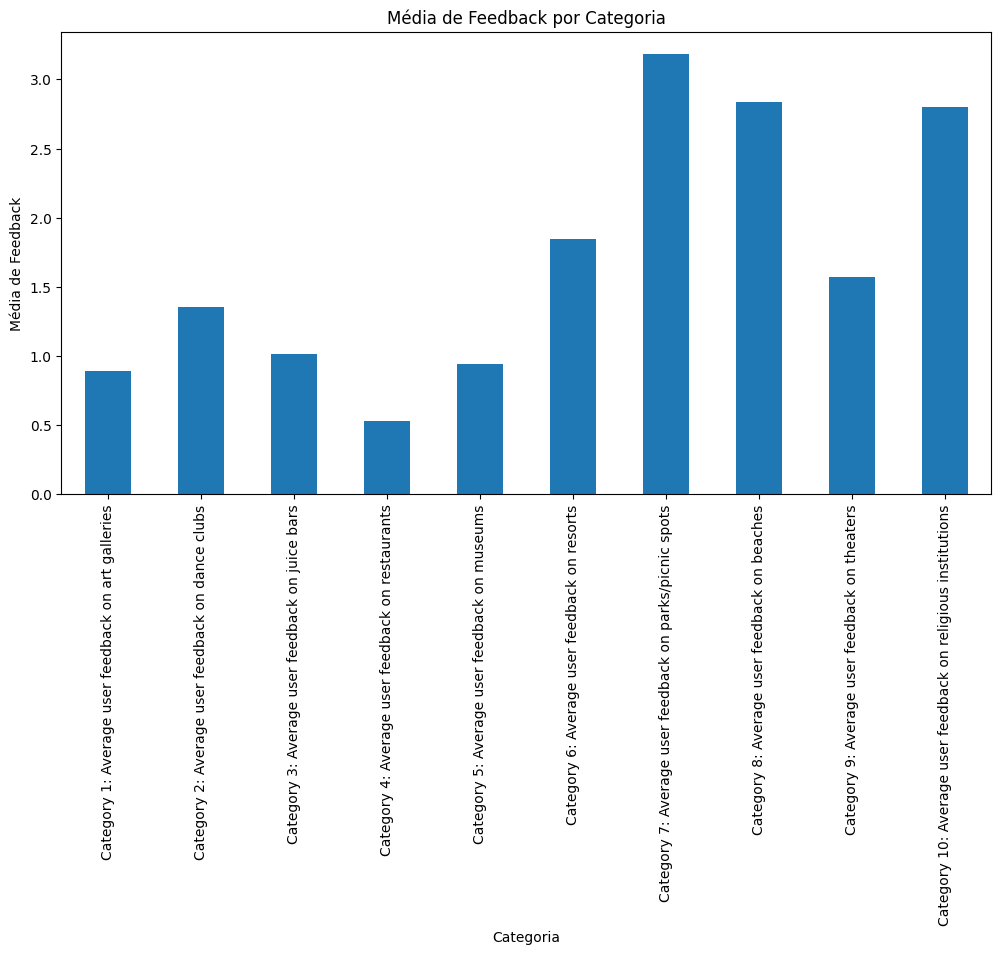

In [27]:
mean_feedback = dataset[category_columns].mean()

mean_feedback.plot(kind='bar', figsize=(12, 6))
plt.title('Média de Feedback por Categoria')
plt.ylabel('Média de Feedback')
plt.xlabel('Categoria')
plt.show()

**matriz de correlação entre as categorias**

**Gráfico de pontos (scatter plot)** dispersão entre duas categorias

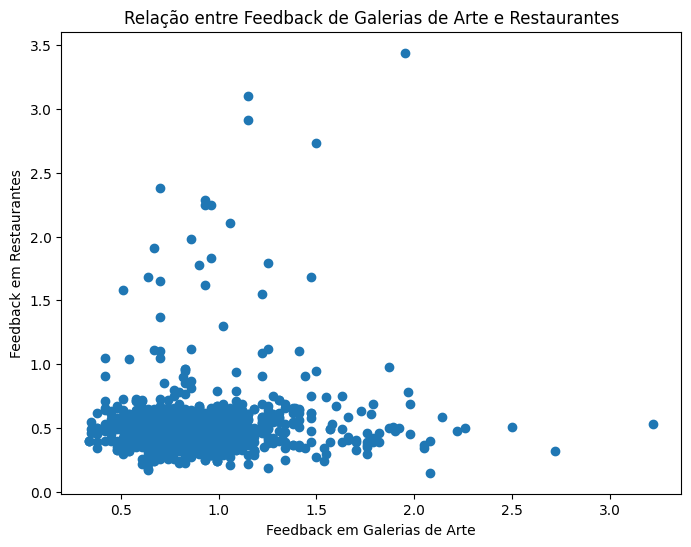

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Category 1: Average user feedback on art galleries'],
            dataset['Category 4: Average user feedback on restaurants'])
plt.title('Relação entre Feedback de Galerias de Arte e Restaurantes')
plt.xlabel('Feedback em Galerias de Arte')
plt.ylabel('Feedback em Restaurantes')
plt.show()


**Análise de padrões e agrupamentos (Clustering)**

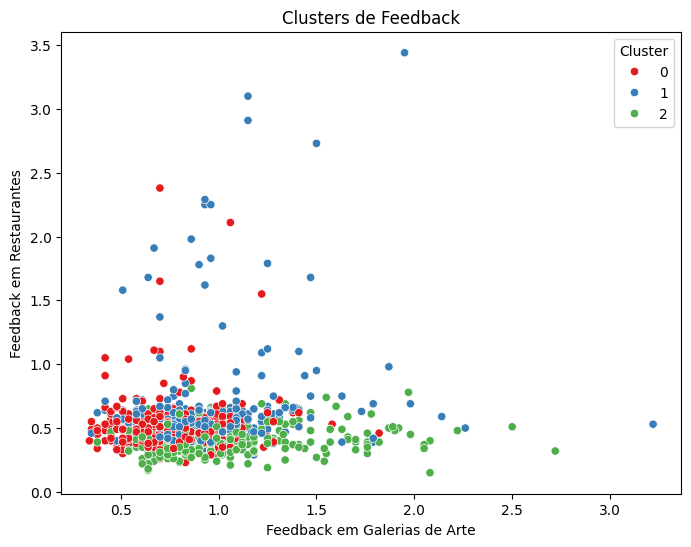

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset[category_columns])

kmeans = KMeans(n_clusters=3, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset['Category 1: Average user feedback on art galleries'],
                y=dataset['Category 4: Average user feedback on restaurants'],
                hue=dataset['Cluster'], palette='Set1')
plt.title('Clusters de Feedback')
plt.xlabel('Feedback em Galerias de Arte')
plt.ylabel('Feedback em Restaurantes')
plt.show()


**boxplot para visualizar a dispersão das notas em cada categoria**

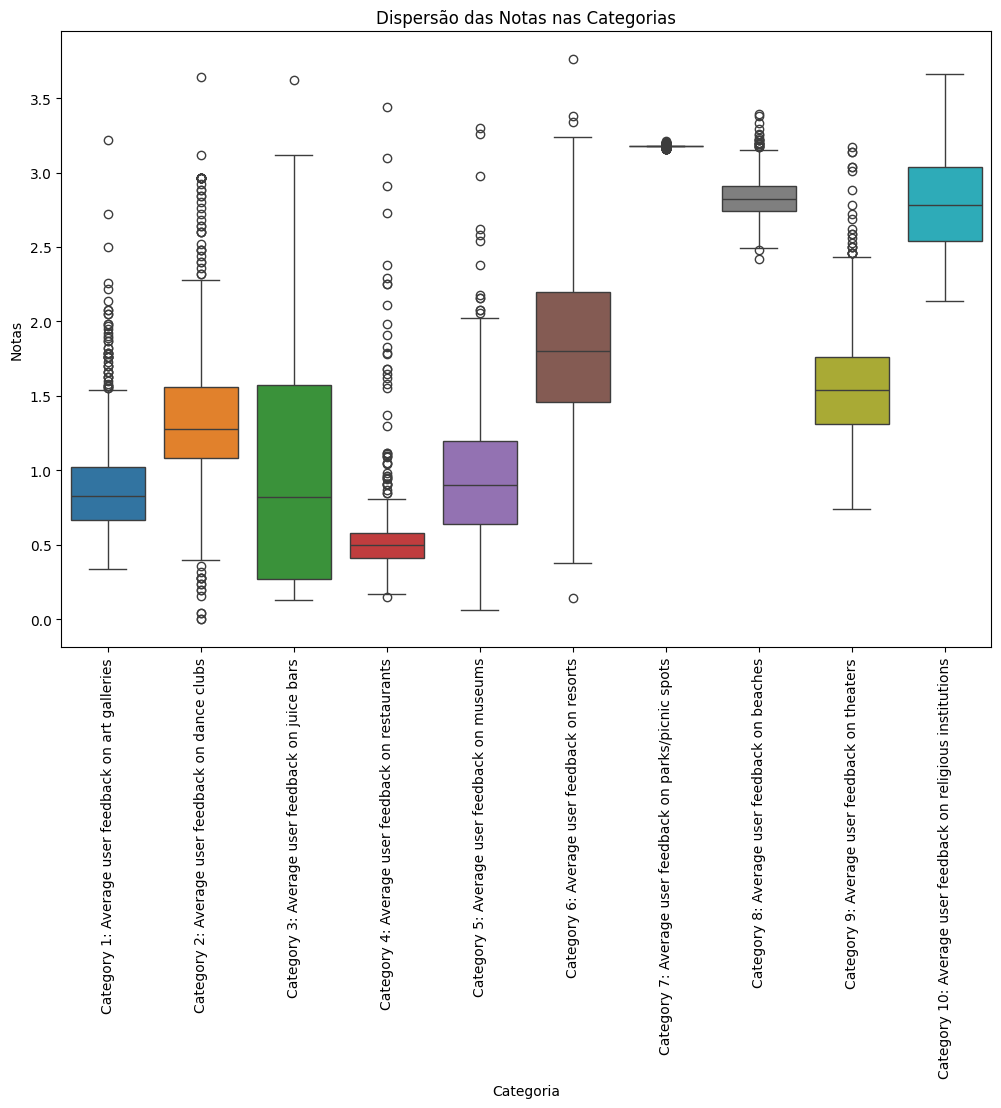

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset[category_columns])
plt.title('Dispersão das Notas nas Categorias')
plt.xlabel('Categoria')
plt.ylabel('Notas')
plt.xticks(rotation=90)
plt.show()